# **CSE 6363 Machine Learning Project Phase - 2**
##                                      Sentiment Analysis of IMDB movie reviews  

## Pre-processing the Large Movie review dataset


### **Team 13**:

1.	Sriram Manoj Arava
2.	Aravind Yalla
3.	Abhisek

### Data Preprocessing Steps:
#### The initial and essential step in preparing data for machine learning is to acquire the relevant dataset. This dataset could be gathered from diverse sources and may require logical combination to create a meaningful dataset. In this specific case, the data was obtained by downloading it from a website - http://ai.stanford.edu/~amaas/data/sentiment/.

In [ ]:
import glob
import re
import os
import random
import numpy as np
import pandas as pd

# python -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# pip install -U gensim
import gensim



In [ ]:
#For Modelling the data
# pip install scikit-learn
!pip install ktrain
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text
import tensorflow_hub as hub
import tensorflow_text as text
import ktrain
from ktrain import text

In the past, acquiring data for machine learning typically involved accessing local files or directories. However, with the use of Tensorflow's keras.utils.get_file function, it is now possible to obtain data directly from a specified hyperlink, such as https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file. The downloaded files will be saved in the subdirectory "datasets" within the ".keras" directory. As an example, a file named "example.txt" can be found in the following directory: /.keras/datasets/example.txt.

In [ ]:
dataset_dir = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz",
                                  origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                  extract = True)

84125825/84125825 [==============================] - 9s 0us/step


In [ ]:
dataset_dir

'/root/.keras/datasets/aclImdb_v1.tar.gz'

Below function takes one or more path components as input and returns a string representing the complete path

In [ ]:
IMDB_DATADIR = os.path.join(os.path.dirname(dataset_dir), 'aclImdb')
IMDB_DATADIR

'/root/.keras/datasets/aclImdb'

Below we are storing directory path in a list


In [ ]:
dir = []
dir.append(r"/root/.keras/datasets/aclImdb/train/pos")
dir.append(r"/root/.keras/datasets/aclImdb/train/neg")
dir.append(r"/root/.keras/datasets/aclImdb/test/pos")
dir.append(r"/root/.keras/datasets/aclImdb/test/neg")

### Data Preparation
#### Identifying and handling the missing values: 
In the data preparation phase, it is important to accurately identify missing values and handle them appropriately. Failure to do so can lead to incorrect interpretation of the data. Additionally, when working with text data, it is crucial to remove any invalid strings or characters to ensure accurate analysis and interpretation of the data.

In [ ]:
def removeAllInvalid(text):
    text = text.replace("<br />", " ")#To remove the <br  /> charcter at the end of each data
    pattern = re.compile(r'[\r\n\t]{1,}')
    text = re.sub(pattern, ' ', text)
    pattern = re.compile(r'[ ]{2,}') #Removing the empty spaces
    text = re.sub(pattern, ' ', text)#Replacing the pattern with a space and text
    return text.strip()#Stripping the trailing and leading spaces

In [ ]:
def getLabel(absolute):
    basename = os.path.basename(absolute)  # Get the file name from the absolute path
    info =  os.path.splitext(basename)  # Split the file name and extension
    filename = info[0]  # Get the file name without extension
    fileInfo = filename.split("_")  # Split the file name by underscore
    return fileInfo[1]  # Return the second part as the label

In [ ]:
def strip_html_tags(text):
    # Remove HTML tags using regular expressions
    stripped_text = re.sub(r'<[^>]+>', '', text)
    # Unescape HTML entities using the html module
    stripped_text = html.unescape(stripped_text)
    return stripped_text


In [ ]:
def remove_links(text):
    # Remove links using regular expressions
    text = re.sub(r'http\S+', '', text)
    return text

In [ ]:
getLabel("aclImdb\train\pos\1_8.txt")

'8'

Removing all the invalid Charecters,
Getting the Labels,
Writing back the content along with labels,
All the functions are performed on the 4 files which are stored in the directory

In [ ]:
import html
file_big = 'aclImdb-all.txt'
with open(file_big, 'w', encoding = 'utf-8') as fnew:
    for d in dir: #Reading through all directories inn dir
        files = glob.glob(d + '//*.txt')# getting all files in each direcotry
        for f in files:
            content = ''
            with open(f, 'r', encoding = 'utf-8') as fold:#reading the content of each file
                content = fold.read()
            content = removeAllInvalid(content)#removing the invalid charecters
            content = strip_html_tags(content)
            content = remove_links(content)
            label = getLabel(f)#getting the label
            fnew.write(content + "\t" + label + "\n") #writing the content back to the file_big along with the label

In [ ]:
aclImdb_file = 'aclImdb-all.txt'
all_lines = []
with open(aclImdb_file, 'r', encoding = 'utf-8') as f:
    all_lines = f.readlines()

In [ ]:
(all_lines)

["This is a very strange HK film in many ways. First, many of the action sequences really aren't that much fun. The very first gun battle the occurs in the film was just silly. Not cool silly, or even funny silly, but just silly. That's not to say there aren't some great action scenes, but most simply don't come up to the level of some of the other films I have seen. The opposite side is that this film actually has CHARACTERS, not just people. All of the main characters are interesting (except for the head bad guy, who is flat as a billiard table) and most are fairly well acted. All the protagonists in this film are just fun to watch. The dialogue is quite witty, and doesn't seem to lose much in translation. This film is worth seeing, but I hope that uninitiated American audiences don't think this is the best HK has to offer.\t8\n",
 'I never seem to write a review on IMDb unless I am extremely surprised at how good, or how bad, a movie is. This film falls into the first category. Ever

In [ ]:
all_lines[7]


'Much to her adult children\'s chagrin & nearly immediately after Elizabeth\'s (Dame Judy Dench) husband\'s death, the widowed, attic tenor saxophone player becomes bent upon openly returning to her musical hobby. Now that George is dead, Elizabeth no longer has to practice playing sax in the attic. As she grows more pleased with playing in the open, Elizabeth takes a stroll along memory lane, remembering when she was a 15 year old member of a jazz swing band, "The Blonde Bombshells": supposedly, an all-girl WWII group of talented jazz swing musicians. One of the "Blonde Bombshells\'" band members was a womanizing, cross-dressing drummer, Patrick (Ian Holm), with whom Elizabeth remained friends. Both Patrick & Elizabeth\'s 12-year-old grand-daughter, Joanna (Millie Findlay), press Elizabeth to round up the former band members & take up performing together again; this time as a bunch of sexagenarians. Among the band members she finds are the (still foxy!) bass playing, Madeleine (Leslie

In [ ]:
total = len(all_lines)
random.shuffle(all_lines)

In [ ]:
total

50000

**bold text**### Encoding the categorical data:
The given dataset contains data that is divided into distinct categories, commonly known as categorical data. Within this dataset, there are three variables - Analysis, Evaluation, and Source - each of which represents a different category.
### Splitting the dataset:
Every dataset for a Machine Learning model should be divided into two sets: training and test.
A portion of a dataset used to train a machine learning model is called a training set. In contrast, a test set is a subset of the dataset that is used to evaluate the machine learning model. The test set is used by the ML model to predict outcomes.
We separated the dataset into training, testing, and validation in an 7.5:1.5:1 ratio in our project.

In [ ]:
train_len = int(total*0.75)
test_len = int(total*0.15)
train_lines = all_lines[0:train_len]
test_lines = all_lines[train_len: (train_len + test_len)]
val_lines = all_lines[(train_len + test_len):]

In [ ]:
print("Train:",len(train_lines))
print("Test:",len(test_lines))
print("Val:",len(val_lines))

Train: 37500
Test: 7500
Val: 5000


In [ ]:
def saveFile(file, lines):
    with open(file, 'w', encoding = 'utf-8') as f:
        f.writelines(lines)
        
train_file = 'aclImdb-train.txt'
test_file = 'aclImdb-test.txt'
val_file = 'aclImdb-val.txt'
saveFile(train_file, train_lines)
saveFile(test_file, test_lines)
saveFile(val_file, val_lines)

In [ ]:
train_df = pd.read_csv(r"./aclImdb-train.txt",delimiter='\t',
                        header=None, 
                        names=['Review', 'Rating'])
train_df["Source"] = "Imdb"

In [ ]:
review = train_df['Review']
duplicated_review = train_df[review.isin(review[review.duplicated()])].sort_values("Review")
train_df.drop_duplicates(inplace = True)
print('The dataset contains {} rows and {} columns after removing duplicates'.format(train_df.shape[0],train_df.shape[1]))

The dataset contains 37267 rows and 3 columns after removing duplicates


In [ ]:
train_df.head()

,Review,Rating,Source
0,"This is a pretty silly film, including what ma...",8,Imdb
1,Much better than expected. Good family flick -...,7,Imdb
2,I thought this was one of the most depressing ...,3,Imdb
3,This film contain far too much meaningless vio...,3,Imdb
4,Komodo vs. Cobra is not going to set the world...,4,Imdb


In [ ]:
test_df = pd.read_csv(r"./aclImdb-test.txt",delimiter='\t',
                        header=None, 
                        names=['Review', 'Rating'])
test_df["Source"] = "Imdb"


In [ ]:
test_df.head()

,Review,Rating,Source
0,"This one has a lot going for it - Sinatra, Sty...",7,Imdb
1,I recently had to watch this for a project in ...,1,Imdb
2,Great screenplay and some of the best actors t...,10,Imdb
3,sdiner82 had clearly not seen the film in deca...,1,Imdb
4,I fully agree with the previous reviewer. Ther...,4,Imdb


In [ ]:
val_df = pd.read_csv(r"./aclImdb-val.txt",delimiter='\t',
                        header=None, 
                        names=['Review', 'Rating'])
val_df["Source"] = "Imdb"


In [ ]:
val_df.head()

,Review,Rating,Source
0,"The message of this movie is ""personality is m...",1,Imdb
1,I just picked up the DVD release of this movie...,9,Imdb
2,This is probably the worst movie I've seen in ...,1,Imdb
3,Asterix and the Vikings is the first animated ...,7,Imdb
4,Journey of Hope tells of a poor Turkish family...,7,Imdb


In [ ]:
print("Train:",len(train_df))
print("Test:",len(test_df))
print("Val:",len(val_df))

Train: 37267
Test: 7500
Val: 5000


### Exploratory Data Analysis:
#### Sentiment Analysis :
Sentiment analysis uses text analysis tools to evaluate and classify emotions such as positive, negative, and neutral within text data.

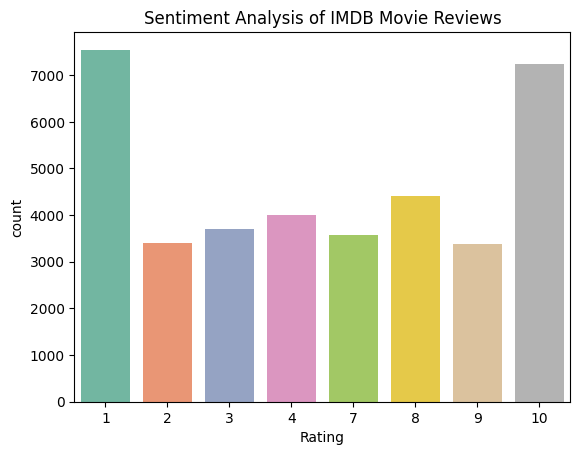

In [ ]:
sns.countplot(x=train_df['Rating'],  palette=sns.color_palette("Set2")).set_title("Sentiment Analysis of IMDB Movie Reviews")

# Add axis labels

plt.show()

### Feature scaling:
It's a technique for keeping a dataset's independent variables inside a certain range. To put it another way, feature scaling narrows the range of variables so that we can do the comparison on common grounds.
Sort From Low to High Rating (i.e Negative to Positive)

In [ ]:
train_df.head(10).sort_values('Rating')

,Review,Rating,Source
2,I thought this was one of the most depressing ...,3,Imdb
3,This film contain far too much meaningless vio...,3,Imdb
4,Komodo vs. Cobra is not going to set the world...,4,Imdb
6,This movie is like the material S.E. Hinton wa...,4,Imdb
1,Much better than expected. Good family flick -...,7,Imdb
5,I can't believe I rarely ever see this title m...,7,Imdb
7,"This game has cartoon graphics, not much viole...",7,Imdb
9,"This time around, Blackadder is no longer roya...",7,Imdb
0,"This is a pretty silly film, including what ma...",8,Imdb
8,This movie is all about subtlety and the diffi...,9,Imdb


In [ ]:
test_df.head(10).sort_values('Rating')

,Review,Rating,Source
1,I recently had to watch this for a project in ...,1,Imdb
3,sdiner82 had clearly not seen the film in deca...,1,Imdb
4,I fully agree with the previous reviewer. Ther...,4,Imdb
0,"This one has a lot going for it - Sinatra, Sty...",7,Imdb
8,Four teenage girls in a suburb of Los Angeles ...,7,Imdb
9,Let's keep it simple: My two kids were glued t...,7,Imdb
6,They say that it is always better in horror mo...,9,Imdb
7,"Brutal, emotionless Michael Myers stabs his si...",9,Imdb
2,Great screenplay and some of the best actors t...,10,Imdb
5,I loved Complete Savages! Why did they cancel ...,10,Imdb


In [ ]:
val_df.head(10).sort_values('Rating')

,Review,Rating,Source
0,"The message of this movie is ""personality is m...",1,Imdb
2,This is probably the worst movie I've seen in ...,1,Imdb
5,Well since seeing part's 1 through 3 I can hon...,1,Imdb
7,This film is bad. Not so bad it is good. Just ...,1,Imdb
3,Asterix and the Vikings is the first animated ...,7,Imdb
4,Journey of Hope tells of a poor Turkish family...,7,Imdb
6,Johnny Dangerously is a sort of hit and miss c...,7,Imdb
9,"I had watched snippets from this as a kid but,...",7,Imdb
1,I just picked up the DVD release of this movie...,9,Imdb
8,Just before dawn is an underrated horror film ...,9,Imdb


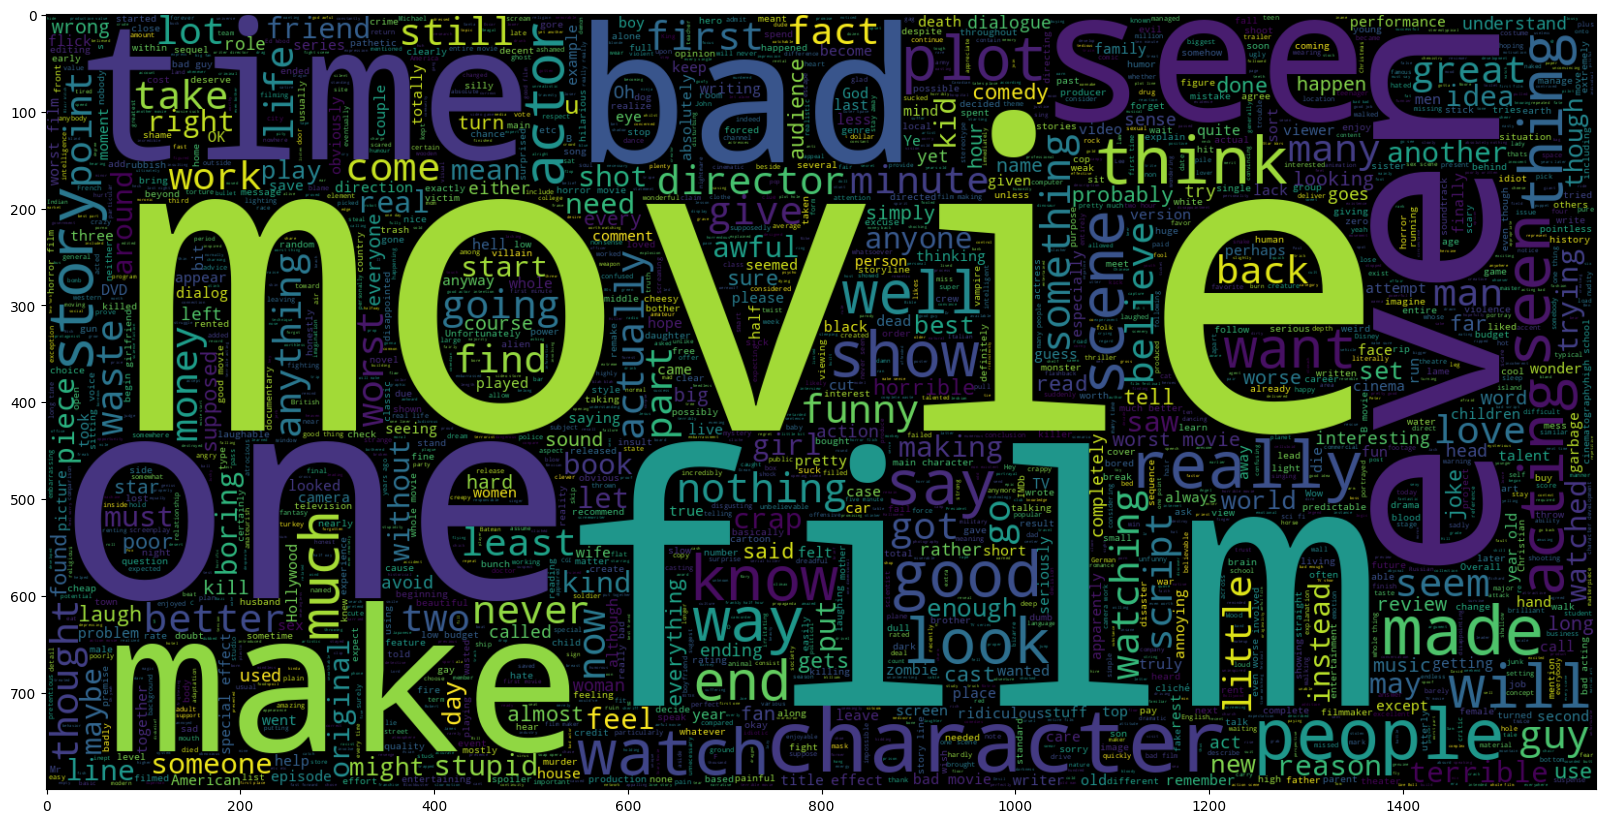

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_df[train_df.Rating == 1].Review))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Tokenization
In Natural Language Processing (NLP), tokenization is a typical activity. Both classic NLP approaches like Count Vectorizer and Advanced Deep Learning-based systems rely on it. Tokenization is the process of breaking down a large chunk of text into smaller tokens. Tokens can be words, characters, or sub words in this case. The building components of Natural Language are tokens.

The Process of dividing a paragraph into different set of statements. It can also include dividing a statement into different set of words.

#### Cleaning: 
The process involves removing any special characters, numbers and any symbols that do not add any meaning. The analytics section does not have any value for such words/characters 



In [ ]:
train_df.shape

(37267, 3)

In [ ]:
train_df.Review[1]

'Much better than expected. Good family flick - catch it on reruns. The whole is more than the sum of its parts. Paul Giamatti chews up the scenery - he has way more talent then the role deserves. A treat to watch Inspector Uhl from "The Illusionist" go over the top. The blue man scenes had my 11 year old in stitches. The cameos were particular fun for the parents - nice to see Lee Majors and Urkel (umm, Jaleel) again. It\'s going to be tough to think up 10 lines for this film , but let\'s hear it for a movie that promotes honesty between a child and their parents! Amanda Bynes does a fine job when she gets to be part of the sting. I normally can\'t stand Frankie Muniz but he is just fine here. Hats off to the casting director - if only for hiring Giamatti!'

In [ ]:
train_df['Sentiment'] = train_df['Rating'].apply(lambda x: 'positive' if x in [7,8,9,10] else 'negative' if x in [1,2,3,4] else 'neutral')
train_df.drop('Rating', axis=1, inplace=True) 
test_df['Sentiment'] = test_df['Rating'].apply(lambda x: 'positive' if x in [7,8,9,10] else 'negative' if x in [1,2,3,4] else 'neutral')
test_df.drop('Rating', axis=1, inplace=True)
val_df['Sentiment'] = val_df['Rating'].apply(lambda x: 'positive' if x in [7,8,9,10] else 'negative' if x in [1,2,3,4] else 'neutral')
val_df.drop('Rating', axis=1, inplace=True)


### Tokenization Process:
#### 1. Removing Stop Words 
#### 2. Convert the Words to Lower Case for better comparability
#### 3. Remove Trailing Spaces, Punctuation etc

simple_preprocess is the library in the gensim library that tokenizes a string of text and preprocesses it by removing punctuations, numbers, and other non-alphabetic characters. It returns a list of lowercase tokens, which can be used for further text processing tasks, such as building a bag-of-words model or training a word embedding model.

In [ ]:
gensim.utils.simple_preprocess(train_df.Review[1])

['much',
 'better',
 'than',
 'expected',
 'good',
 'family',
 'flick',
 'catch',
 'it',
 'on',
 'reruns',
 'the',
 'whole',
 'is',
 'more',
 'than',
 'the',
 'sum',
 'of',
 'its',
 'parts',
 'paul',
 'giamatti',
 'chews',
 'up',
 'the',
 'scenery',
 'he',
 'has',
 'way',
 'more',
 'talent',
 'then',
 'the',
 'role',
 'deserves',
 'treat',
 'to',
 'watch',
 'inspector',
 'uhl',
 'from',
 'the',
 'illusionist',
 'go',
 'over',
 'the',
 'top',
 'the',
 'blue',
 'man',
 'scenes',
 'had',
 'my',
 'year',
 'old',
 'in',
 'stitches',
 'the',
 'cameos',
 'were',
 'particular',
 'fun',
 'for',
 'the',
 'parents',
 'nice',
 'to',
 'see',
 'lee',
 'majors',
 'and',
 'urkel',
 'umm',
 'jaleel',
 'again',
 'it',
 'going',
 'to',
 'be',
 'tough',
 'to',
 'think',
 'up',
 'lines',
 'for',
 'this',
 'film',
 'but',
 'let',
 'hear',
 'it',
 'for',
 'movie',
 'that',
 'promotes',
 'honesty',
 'between',
 'child',
 'and',
 'their',
 'parents',
 'amanda',
 'bynes',
 'does',
 'fine',
 'job',
 'when',
 'sh

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
train_df['Review'] = train_df['Review'].apply(lambda x: remove_stopwords(x))

In [ ]:
## Apply tokenization to entire Review Column
clean_train = train_df.Review.apply(gensim.utils.simple_preprocess)
clean_train

0        [this, pretty, silly, film, including, erotic,...
1        [much, better, expected, good, family, flick, ...
2        [thought, depressing, holiday, movies, seen, t...
3        [this, film, contain, far, meaningless, violen...
4        [komodo, vs, cobra, going, set, world, fire, i...
                               ...                        
37495    [okay, starts, unimaginatively, narration, lea...
37496    [paul, totally, ripped, paramount, dave, it, s...
37497    [this, movie, faint, weak, heart, it, couldn, ...
37498    [this, film, revolves, arabian, leader, amir, ...
37499    [creep, new, horror, film, that, doubt, genre,...
Name: Review, Length: 37267, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
most_common_uni = get_top_text_ngrams(train_df.Review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

Word2Vec:[https://medium.com/towards-data-science/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456]

The Word2Vec model is used to extract the notion of relatedness across words or products such as semantic relatedness, synonym detection, concept categorization, selectional preferences, and analogy. A Word2Vec model learns meaningful relations and encodes the relatedness into vector similarity. The main applications of Word2Vec can be summarized in knowledge discovery and recommender systems. In Word2vector representations (embeddings) of words, where words that appear in similar contexts are mapped to similar points in a high-dimensional space.

Window parameter determines the maximum distance between the current and predicted word within a sentence. The min_count parameter specifies the minimum number of times a word must appear in the corpus to be included in the vocabulary. Finally, workers specifies the number of threads to use for training the model.

In [ ]:
model = gensim.models.Word2Vec(
   window = 9, 
   workers =  4, 
   min_count = 3
          
) 

In the below Code build_vocab method is used to construct the vocabulary from the corpus of text. clean_train variable contains the preprocessed and cleaned text data, which can be used to build the vocabulary for the Word2Vec model. The progress_per parameter specifies the number of words to process before printing the progress message. Below code initializes the model with the vocabulary and other hyperparameters specified earlier.

In [ ]:
model.build_vocab(clean_train,progress_per = 1000)

In [ ]:
model

The epochs attribute of a Word2Vec model in gensim represents the number of times the model has iterated over the entire corpus during training.

The corpus_count attribute represents the number of documents in the corpus used to train the model.

In [ ]:
model.epochs
model.corpus_count

37267

Training the Model


In [ ]:
model.train(clean_train, total_examples = model.corpus_count, epochs=model.epochs)

(20831849, 22275945)

The similarity is measured based on the cosine similarity between the word vectors. The output is a list of (word, similarity score) pairs, sorted by similarity score in descending order

In [ ]:
model.wv.most_similar("good")

[('decent', 0.7671663165092468),
 ('great', 0.6794007420539856),
 ('nice', 0.6739080548286438),
 ('bad', 0.6361152529716492),
 ('excellent', 0.6061108112335205),
 ('fine', 0.6017922759056091),
 ('ok', 0.5974379777908325),
 ('okay', 0.5948894619941711),
 ('alright', 0.5841323137283325),
 ('cool', 0.5701720118522644)]

In [ ]:
model.wv.most_similar("bad")

[('awful', 0.7389639616012573),
 ('terrible', 0.7351744174957275),
 ('horrible', 0.7050586938858032),
 ('sucks', 0.6903173327445984),
 ('lousy', 0.6646990776062012),
 ('crappy', 0.653538703918457),
 ('good', 0.6361151337623596),
 ('sucked', 0.6269255876541138),
 ('horrid', 0.6268001794815063),
 ('worse', 0.6226110458374023)]

Calculates the cosine similarity between the two words given as input. In this case, it calculates the cosine similarity between the word "awful" and "poor". The value returned indicates how similar the two words are to each other in terms of their contexts and distributions within the training corpus.

In [ ]:
model.wv.similarity(w1="awful",w2="poor")

0.6667968

 Encoder is a pre-trained BERT model that has been trained on uncased English text. It has 12 layers, a hidden size of 768, and 12 attention heads
 Preprocess that can tokenize and preprocess text in the same way that the BERT model was trained on. This includes tasks such as lowercasing, splitting words into subwords, and adding special tokens like [CLS] and [SEP

In [ ]:
encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network

TensorFlow Hub KerasLayer that performs the preprocessing required to the BERT model. It tokenizes the input text into subwords, creates input segments and masks, and standardizes the input format. This layer takes in raw text input and outputs a dictionary containing the preprocessed input for the BERT mode

In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocess)

BERT preprocess model has various features to preprocess the text data such as tokenization, masking, and padding. When we pass the text data through this preprocess model, it returns a dictionary containing various keys such as 'input_word_ids', 'input_mask', 'input_type_ids', etc. These keys contain the preprocessed data in the form of token IDs, mask IDs, and type IDs which are further used in the BERT model to generate the embeddings for the text data.

In [ ]:
text_test = clean_train[0]
preprocessed = bert_preprocess_model(text_test)
preprocessed.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [ ]:
text_test

['this',
 'pretty',
 'silly',
 'film',
 'including',
 'erotic',
 'come',
 'on',
 'big',
 'screen',
 'the',
 'heroine',
 'pours',
 'invites',
 'hero',
 'lick',
 'yuck',
 'and',
 'features',
 'resplendent',
 'lucinda',
 'dickey',
 'far',
 'away',
 'erotic',
 'performance',
 'in',
 'long',
 'ago',
 'days',
 'women',
 'action',
 'heroines',
 'real',
 'muscles',
 'rarity',
 'remember',
 'way',
 'jaw',
 'dropped',
 'dickey',
 'took',
 'shirt',
 'revealing',
 'powerfully',
 'built',
 'female',
 'biceps',
 'seen',
 'dickey',
 'beauty',
 'vitality',
 'carry',
 'film',
 'female',
 'schwarzenegger',
 'anybody',
 'vision',
 'promote',
 'her']

Below code represents the tokenized input sequence, where each word in the sequence is mapped to a unique integer ID. These integer IDs are generated based on the BERT tokenizer, which has a fixed vocabulary size. Each input sequence is padded to a maximum length, which is specified during the preprocessing step.

This input_word_ids tensor can be used as input to the BERT model for training

In [ ]:
preprocessed['input_word_ids']

<tf.Tensor: shape=(60, 128), dtype=int32, numpy=
array([[  101,  2023,   102, ...,     0,     0,     0],
       [  101,  3492,   102, ...,     0,     0,     0],
       [  101, 10021,   102, ...,     0,     0,     0],
       ...,
       [  101,  4432,   102, ...,     0,     0,     0],
       [  101,  5326,   102, ...,     0,     0,     0],
       [  101,  2014,   102, ...,     0,     0,     0]], dtype=int32)>

Input_mask tensor has the same shape as the input_word_ids tensor and is used to indicate which elements of the input_word_ids tensor should be attended to by the model. Specifically, the input_mask tensor contains 1s in positions corresponding to the actual tokens of the input sequence and 0s in positions corresponding to the padding tokens. This mask is used to indicate which elements of the input sequence should be attended to by the model and which should be ignored

In [ ]:
preprocessed['input_mask']

<tf.Tensor: shape=(60, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

Input_type_ids tensor is used to distinguish between the different segments in the input sequence. It has the same shape as input_word_ids and input_mask, and consists of 0s and 1s, where 0s indicate the first segment and 1s indicate the second segment. In the case of a single-segment input, all values in input_type_ids will be 0.

[CLS]: A special token added at the beginning of the input sequence, which represents the classification task.

[SEP]: A special token added between two sentences in the input sequence.
Regular tokens from the input sequence

In [ ]:
preprocessed['input_type_ids']

<tf.Tensor: shape=(60, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

BERT encoder model from TensorFlow Hub to encode the preprocessed input text. It first initializes the BERT model using the hub.KerasLayer() function and passing the URL of the pre-trained BERT encoder model. Then, it passes the preprocessed text through this model using the bert_model() function and storing the output in bert_op. The output is a dictionary containing various embeddings and other features.

In [ ]:
bert_model = hub.KerasLayer(encoder)
bert_op = bert_model(preprocessed)

In [ ]:
bert_op.keys()

dict_keys(['default', 'pooled_output', 'sequence_output', 'encoder_outputs'])

bert_op['pooled_output'] refers to the final hidden state [CLS] and applies a non-linear activation function followed by a linear layer to obtain a fixed-size vector representation of the input sequence. 

This hidden state can be used for various downstream tasks such as text classification, named entity recognition, etc.

In [ ]:
bert_op['pooled_output']

<tf.Tensor: shape=(60, 768), dtype=float32, numpy=
array([[-0.81437576, -0.13956855,  0.66029966, ...,  0.5123949 ,
        -0.50558966,  0.8385645 ],
       [-0.728891  , -0.10328632,  0.73977315, ...,  0.56129616,
        -0.5076488 ,  0.78912085],
       [-0.7563503 , -0.09928081,  0.64691466, ...,  0.54051477,
        -0.4760831 ,  0.83528584],
       ...,
       [-0.8353849 , -0.21800998,  0.43928018, ...,  0.38032833,
        -0.5823961 ,  0.83569384],
       [-0.8417146 , -0.27861875,  0.17537306, ...,  0.310468  ,
        -0.6291445 ,  0.8228667 ],
       [-0.7427317 , -0.12759988,  0.6989013 , ...,  0.58256114,
        -0.4978893 ,  0.76981   ]], dtype=float32)>

Each token of the input sequence is mapped to a sequence of hidden states that are learned during the training process of the BERT model. These hidden states are used to compute attention scores for each token in the input sequence.

In [ ]:
bert_op['sequence_output']

<tf.Tensor: shape=(60, 128, 768), dtype=float32, numpy=
array([[[-2.39456058e-01,  1.22578472e-01, -6.32634461e-02, ...,
         -1.38057917e-01,  1.00229241e-01,  2.21667215e-01],
        [-3.80687773e-01, -4.76922959e-01, -9.31919143e-02, ...,
         -1.87727392e-01,  1.44293904e-02,  8.69582817e-02],
        [ 9.81189132e-01,  6.48005009e-02, -3.45980793e-01, ...,
         -2.12507635e-01, -7.88298130e-01, -1.84248775e-01],
        ...,
        [-5.07664859e-01, -4.76023465e-01,  6.10756502e-02, ...,
          7.32761621e-02,  1.50152266e-01,  6.88448399e-02],
        [-2.66618550e-01, -3.69862378e-01,  2.67716765e-01, ...,
          1.16024159e-01,  8.00740570e-02, -4.38603312e-02],
        [-2.87386507e-01, -3.16913217e-01,  3.71319205e-01, ...,
          1.85932994e-01,  2.18884155e-01, -1.62843484e-02]],

       [[-2.10112229e-01,  1.41296372e-01, -1.24740303e-01, ...,
         -1.92749530e-01,  4.37465198e-02,  1.32863289e-02],
        [-1.96657583e-01, -2.40198135e-01, -9.7

In [ ]:
len(bert_op['encoder_outputs'])

12


Contains a tuple with two elements, where the first element is the sequence output and the second element is the pooled output.

In [ ]:
bert_op['encoder_outputs']

[<tf.Tensor: shape=(60, 128, 768), dtype=float32, numpy=
 array([[[ 9.73295942e-02,  2.26678140e-03, -9.26756412e-02, ...,
          -1.46113411e-02,  7.33136237e-02,  4.00271192e-02],
         [-1.88009143e-01,  4.03715223e-01,  1.45506591e-01, ...,
          -8.13112855e-02,  3.32145691e-01,  3.67295854e-02],
         [-4.60494816e-01,  1.86400577e-01,  3.92585769e-02, ...,
          -4.65222239e-01,  7.69461095e-01, -5.87848276e-02],
         ...,
         [-1.24520577e-01, -9.58479419e-02,  5.85318148e-01, ...,
           3.41009617e-01, -4.32976037e-01,  5.29659390e-02],
         [-2.25969329e-01, -1.22907475e-01,  4.59655523e-01, ...,
           3.35485160e-01, -3.19392741e-01, -1.94832198e-02],
         [-1.13377601e-01, -5.26145510e-02,  4.93075013e-01, ...,
           6.75534606e-01, -6.33712173e-01, -8.96740109e-02]],
 
        [[ 1.63766086e-01,  3.53125297e-02, -1.07619531e-01, ...,
          -5.23807444e-02,  1.31449655e-01, -2.23961622e-02],
         [ 4.81204659e-01,  9.

In [ ]:
bert_op['encoder_outputs'][-1] == bert_op['sequence_output']

<tf.Tensor: shape=(60, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True, 

text.texts_from_df() function is used to preprocess text data for a BERT model by taking in the training and validation dataframes, specifying the text and label columns, setting the maximum length of the sequences to 500, and returning the preprocessed data 

In [ ]:
(x_train, y_train),(x_test,y_test), preproc = text.texts_from_df(
                                                train_df = train_df, 
                                                text_column = 'Review',
                                                label_columns = 'Sentiment',
                                                val_df = val_df,
                                                maxlen = 500, 
                                                preprocess_mode = 'bert'
)

['negative', 'positive']
   negative  positive
0       0.0       1.0
1       0.0       1.0
2       1.0       0.0
3       1.0       0.0
4       1.0       0.0
['negative', 'positive']
   negative  positive
0       1.0       0.0
1       0.0       1.0
2       1.0       0.0
3       0.0       1.0
4       0.0       1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name = 'bert',train_data = (x_train,y_train),preproc = preproc)

Is Multi-Label? False
maxlen is 500


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning:

The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.



done.


In [ ]:
learner = ktrain.get_learner(model=model,
                             train_data=(x_train,y_train),
                             val_data=(x_test,y_test),
                             batch_size=6)

In [68]:
learner.fit_onecycle(lr=2e-5,
                     epochs=1)



begin training using onecycle policy with max lr of 2e-05...
6212/6212 [==============================] - 5376s 862ms/step - loss: 0.2700 - accuracy: 0.8870 - val_loss: 0.1695 - val_accuracy: 0.9356
